In [1]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

# from config import weather_api_key 
from config import weather_api_key
#Import datetime from datetime
from datetime import datetime

import requests

In [2]:
# create a set of random lats and longs combination
lats =np.random.uniform(-90,90,size=1500)
lngs =np.random.uniform(-180, 180, size =1500)
lats_lngs = zip(lats, lngs)
lats_lngs


In [3]:
#create a practice set of random lat and long
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]

coordinates = zip(x,y)


In [4]:
#Use the tuple() function to display the latitude and longitude combintaion
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Use the citipy module to determine city based on lats and longs
from citipy import citipy
coordinates = list(lats_lngs)

In [6]:
# for coordinate in coordinates:
#     print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
#            citipy.nearest_city(coordinate[0],coordinate[1]).country_code
#           )

In [7]:
# create the list of the cities which are unique

cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
cities
len(cities)

625

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#Create an empty list to hold the weather data
city_data =[]

#print the begining of the logging
print("Begining Data Retrieval")
print("-----------------------")

#create counters
record_count = 1 
set_count = 1


# Loop through all the cities in our list:
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes:
    if (i%50==0 and i>50):
        set_count +=1
        record_count =1
    city = city.replace(" ","+")
    # create endpoint URL with each city.
    city_url = url+"&q="+city
    
    #logging the URL record, and set numbers and the city
    print(f"Processing Record {record_count} of set {set_count} | {city}")
#     print(city_url)
    
    # Add 1  to the record count 
    record_count +=1
    
    # Run an API request for each of the cities.
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Begining Data Retrieval
-----------------------
Processing Record 1 of set 1 | belushya+guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=belushya+guba
City not found. Skipping...
Processing Record 2 of set 1 | balakhta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=balakhta
Processing Record 3 of set 1 | batagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=batagay
Processing Record 4 of set 1 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=ancud
Processing Record 5 of set 1 | mirabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=mirabad
Processing Record 6 of set 1 | wanlaweyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=wanlaweyn
Processing

Processing Record 55 of set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=butaritari
Processing Record 56 of set 1 | puerto+colombia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=puerto+colombia
Processing Record 57 of set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=rikitea
Processing Record 58 of set 1 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=laguna
Processing Record 59 of set 1 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=marcona
City not found. Skipping...
Processing Record 60 of set 1 | vila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=vila
Processing Record 61 of set 1 | castro
http://api.op

Processing Record 8 of set 2 | luhyny
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=luhyny
Processing Record 9 of set 2 | te+anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=te+anau
Processing Record 10 of set 2 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=saint-philippe
Processing Record 11 of set 2 | waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=waingapu
Processing Record 12 of set 2 | nata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=nata
Processing Record 13 of set 2 | port-gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=port-gentil
Processing Record 14 of set 2 | roald
http://api.openweathermap.org/data/2.5/wea

City not found. Skipping...
Processing Record 12 of set 3 | luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=luanda
Processing Record 13 of set 3 | bishop+auckland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bishop+auckland
Processing Record 14 of set 3 | bayangol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bayangol
Processing Record 15 of set 3 | cabo+san+lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=cabo+san+lucas
Processing Record 16 of set 3 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=kruisfontein
Processing Record 17 of set 3 | dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=dingle
Processing Record 18 of set 

City not found. Skipping...
Processing Record 16 of set 4 | seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=seoul
Processing Record 17 of set 4 | harrisburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=harrisburg
Processing Record 18 of set 4 | kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=kavaratti
Processing Record 19 of set 4 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=geraldton
Processing Record 20 of set 4 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=tazovskiy
Processing Record 21 of set 4 | nogliki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=nogliki
Processing Record 22 of set 4 | lolua
http://api.ope

Processing Record 20 of set 5 | manaure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=manaure
Processing Record 21 of set 5 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=baruun-urt
Processing Record 22 of set 5 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=pisco
Processing Record 23 of set 5 | omaruru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=omaruru
Processing Record 24 of set 5 | toliary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=toliary
City not found. Skipping...
Processing Record 25 of set 5 | araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=araouane
Processing Record 26 of set 5 | chapais
http://api.openweather

Processing Record 24 of set 6 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=portland
Processing Record 25 of set 6 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=asau
Processing Record 26 of set 6 | pitimbu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=pitimbu
Processing Record 27 of set 6 | buala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=buala
Processing Record 28 of set 6 | tazagyukh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=tazagyukh
City not found. Skipping...
Processing Record 29 of set 6 | guhagar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=guhagar
Processing Record 30 of set 6 | faanui
http://api.openweathermap.org/d

Processing Record 27 of set 7 | warqla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=warqla
City not found. Skipping...
Processing Record 28 of set 7 | grand+river+south+east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=grand+river+south+east
City not found. Skipping...
Processing Record 29 of set 7 | lahaina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=lahaina
Processing Record 30 of set 7 | sakaiminato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=sakaiminato
Processing Record 31 of set 7 | mbanza-ngungu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=mbanza-ngungu
Processing Record 32 of set 7 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d0

Processing Record 30 of set 8 | walvis+bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=walvis+bay
Processing Record 31 of set 8 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bathsheba
Processing Record 32 of set 8 | fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=fort-shevchenko
Processing Record 33 of set 8 | rosita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=rosita
Processing Record 34 of set 8 | chaoyang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=chaoyang
Processing Record 35 of set 8 | jaguaruna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=jaguaruna
Processing Record 36 of set 8 | pedernales
http://api.openweathe

Processing Record 34 of set 9 | ossora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=ossora
Processing Record 35 of set 9 | price
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=price
Processing Record 36 of set 9 | campbell+river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=campbell+river
Processing Record 37 of set 9 | bur+gabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bur+gabo
City not found. Skipping...
Processing Record 38 of set 9 | gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=gamba
Processing Record 39 of set 9 | ratnagiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=ratnagiri
Processing Record 40 of set 9 | isiolo
http://api.openwe

Processing Record 38 of set 10 | luang+prabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=luang+prabang
Processing Record 39 of set 10 | koungou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=koungou
Processing Record 40 of set 10 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=karratha
Processing Record 41 of set 10 | anchorage
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=anchorage
Processing Record 42 of set 10 | chaman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=chaman
Processing Record 43 of set 10 | atambua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=atambua
Processing Record 44 of set 10 | nguiu
http://api.openweathermap.org/dat

City not found. Skipping...
Processing Record 40 of set 11 | homer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=homer
Processing Record 41 of set 11 | nehe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=nehe
Processing Record 42 of set 11 | armizonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=armizonskoye
Processing Record 43 of set 11 | ovalle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=ovalle
Processing Record 44 of set 11 | kolaras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=kolaras
Processing Record 45 of set 11 | ko+samui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=ko+samui
Processing Record 46 of set 11 | chekhov
http://api.openweat

In [10]:
print(city_data)

[{'City': 'Balakhta', 'Lat': 55.38, 'Lng': 91.6, 'Max Temp': -25.62, 'Humidity': 84, 'Cloudiness': 49, 'Wind Speed': 4.18, 'Country': 'RU', 'Date': '2021-01-30 14:10:31'}, {'City': 'Batagay', 'Lat': 67.6333, 'Lng': 134.6333, 'Max Temp': -45.29, 'Humidity': 76, 'Cloudiness': 94, 'Wind Speed': 0.78, 'Country': 'RU', 'Date': '2021-01-30 14:10:31'}, {'City': 'Ancud', 'Lat': -41.8697, 'Lng': -73.8203, 'Max Temp': 59, 'Humidity': 58, 'Cloudiness': 0, 'Wind Speed': 10.36, 'Country': 'CL', 'Date': '2021-01-30 14:10:31'}, {'City': 'Mirabad', 'Lat': 30.4362, 'Lng': 61.8383, 'Max Temp': 63.34, 'Humidity': 23, 'Cloudiness': 90, 'Wind Speed': 2.01, 'Country': 'AF', 'Date': '2021-01-30 14:10:31'}, {'City': 'Wanlaweyn', 'Lat': 2.6185, 'Lng': 44.8938, 'Max Temp': 94.14, 'Humidity': 21, 'Cloudiness': 0, 'Wind Speed': 14.85, 'Country': 'SO', 'Date': '2021-01-30 14:10:31'}, {'City': 'Owando', 'Lat': -0.4819, 'Lng': 15.8999, 'Max Temp': 83.44, 'Humidity': 63, 'Cloudiness': 45, 'Wind Speed': 5.91, 'Country

In [11]:
# convert the city_data array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Balakhta,55.3800,91.6000,-25.62,84,49,4.18,RU,2021-01-30 14:10:31
1,Batagay,67.6333,134.6333,-45.29,76,94,0.78,RU,2021-01-30 14:10:31
2,Ancud,-41.8697,-73.8203,59.00,58,0,10.36,CL,2021-01-30 14:10:31
3,Mirabad,30.4362,61.8383,63.34,23,90,2.01,AF,2021-01-30 14:10:31
4,Wanlaweyn,2.6185,44.8938,94.14,21,0,14.85,SO,2021-01-30 14:10:31
5,Owando,-0.4819,15.8999,83.44,63,45,5.91,CG,2021-01-30 14:10:31
6,Port+Alfred,-33.5906,26.8910,73.99,80,0,3.00,ZA,2021-01-30 14:07:12
7,Melfi,40.9965,15.6514,64.40,48,0,14.97,IT,2021-01-30 14:10:32
8,Lata,40.1629,-8.3327,59.00,72,20,16.11,PT,2021-01-30 14:10:32
9,Farafangana,-22.8167,47.8333,83.64,73,0,13.11,MG,2021-01-30 14:10:32


In [12]:
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Balakhta,RU,2021-01-30 14:10:31,55.3800,91.6000,-25.62,84,49,4.18
1,Batagay,RU,2021-01-30 14:10:31,67.6333,134.6333,-45.29,76,94,0.78
2,Ancud,CL,2021-01-30 14:10:31,-41.8697,-73.8203,59.00,58,0,10.36
3,Mirabad,AF,2021-01-30 14:10:31,30.4362,61.8383,63.34,23,90,2.01
4,Wanlaweyn,SO,2021-01-30 14:10:31,2.6185,44.8938,94.14,21,0,14.85
5,Owando,CG,2021-01-30 14:10:31,-0.4819,15.8999,83.44,63,45,5.91
6,Port+Alfred,ZA,2021-01-30 14:07:12,-33.5906,26.8910,73.99,80,0,3.00
7,Melfi,IT,2021-01-30 14:10:32,40.9965,15.6514,64.40,48,0,14.97
8,Lata,PT,2021-01-30 14:10:32,40.1629,-8.3327,59.00,72,20,16.11
9,Farafangana,MG,2021-01-30 14:10:32,-22.8167,47.8333,83.64,73,0,13.11


In [13]:
# create the output file csv
output_data_file = "weather_data/cities.csv"

#Export the City Data into a csv
city_data_df.to_csv(output_data_file,index_label="City_ID")


### 6.3.1 == Scatter plots

In [14]:
# Extract relevant feilds from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

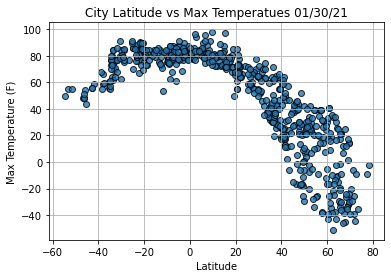

In [15]:
# import time module
import time
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1,marker="o", alpha=0.8, label="Cities")
plt.grid('True')
plt.title(f"City Latitude vs Max Temperatues " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#save the figures
plt.savefig("weather_data/lat_vs_max_temp.png")

#show plt
plt.show()

### 6.3.2 Scatter plot latitudes vs Humidity

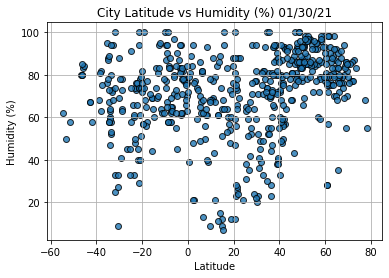

In [16]:
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="Cities"
            )
plt.grid("True")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) "+time.strftime("%x"))

#save the figure
plt.savefig("weather_data/lat_vs_humidity.png")

#show the plt
plt.show()

### 6.3.3 scatter plot lat vs cloudiness (%)

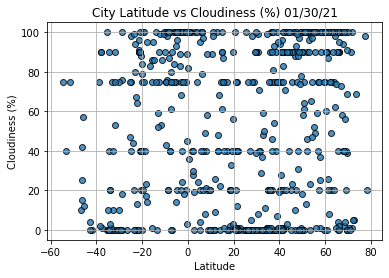

In [17]:
### 6.3.3 Scatter plot lat vs cloudiness (%)
plt.scatter(lats, cloudiness,
           edgecolor="black", marker="o", alpha=0.8, label="Cities")

plt.grid("True")
plt.title(f"City Latitude vs Cloudiness (%) "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save the fif
plt.savefig("weather_data/lat_vs_cloudiness.png")

#plot show
plt.show()

### 6.3.4 scatter plot vs Wind Speed

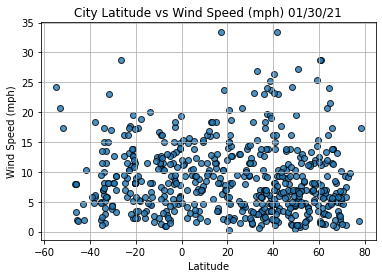

In [18]:
plt.scatter(lats, wind_speed,
            edgecolor="black",
            marker ="o",
            alpha=0.8,
            label="Cities"
            )
plt.grid("True")
plt.title(f"City Latitude vs Wind Speed (mph) "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save the plot
plt.savefig("weather_data/lat_vs_windspeed.png")

#show the plt
plt.show()

### 6.4.2 function for creating scatter plot for linear regression 

In [19]:
# import linregress
from scipy.stats import linregress

#create a function for linear regression and plot a regress line and equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run the regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # cal the regression line y-values from the slope and intercept
    regress_values = x_values * slope + intercept
    
    print(r_value)
    
    # get the line equation
    line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
    #create the scatter plot and plot the regression line
    plt.scatter(x_values, y_values, edgecolor="black")
    plt.grid("True")
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, text_coordinates , fontsize =15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                    Esperance
Country                        AU
Date          2021-01-30 14:10:32
Lat                      -33.8667
Lng                         121.9
Max Temp                     64.4
Humidity                       63
Cloudiness                      0
Wind Speed                  14.97
Name: 13, dtype: object

In [21]:
# northern hemisphere cities
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Balakhta,RU,2021-01-30 14:10:31,55.3800,91.6000,-25.62,84,49,4.18
1,Batagay,RU,2021-01-30 14:10:31,67.6333,134.6333,-45.29,76,94,0.78
3,Mirabad,AF,2021-01-30 14:10:31,30.4362,61.8383,63.34,23,90,2.01
4,Wanlaweyn,SO,2021-01-30 14:10:31,2.6185,44.8938,94.14,21,0,14.85
7,Melfi,IT,2021-01-30 14:10:32,40.9965,15.6514,64.40,48,0,14.97
8,Lata,PT,2021-01-30 14:10:32,40.1629,-8.3327,59.00,72,20,16.11
10,Aswan,EG,2021-01-30 14:10:32,24.0934,32.9070,72.46,21,0,9.44
11,Narsaq,GL,2021-01-30 14:10:32,60.9167,-46.0500,41.00,28,90,28.77
12,Jacmel,HT,2021-01-30 14:10:32,18.2342,-72.5347,80.60,54,20,10.36
15,Hilo,US,2021-01-30 14:10:33,19.7297,-155.0900,68.00,88,90,5.75


In [22]:
southern_hemi_df  = city_data_df.loc[city_data_df['Lat']<0]
southern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Ancud,CL,2021-01-30 14:10:31,-41.8697,-73.8203,59.00,58,0,10.36
5,Owando,CG,2021-01-30 14:10:31,-0.4819,15.8999,83.44,63,45,5.91
6,Port+Alfred,ZA,2021-01-30 14:07:12,-33.5906,26.8910,73.99,80,0,3.00
9,Farafangana,MG,2021-01-30 14:10:32,-22.8167,47.8333,83.64,73,0,13.11
13,Esperance,AU,2021-01-30 14:10:32,-33.8667,121.9000,64.40,63,0,14.97
14,Mataura,NZ,2021-01-30 14:05:44,-46.1927,168.8643,48.00,80,25,8.01
16,Punta+Arenas,CL,2021-01-30 14:10:33,-53.1500,-70.9167,55.40,50,40,20.71
18,Sola,VU,2021-01-30 14:10:33,-13.8833,167.5500,81.41,83,100,20.09
19,Hobart,AU,2021-01-30 14:10:33,-42.8794,147.3294,55.99,67,0,4.61
24,Bluff,NZ,2021-01-30 14:10:34,-46.6000,168.3333,48.00,80,10,8.01


-0.8669964912963971


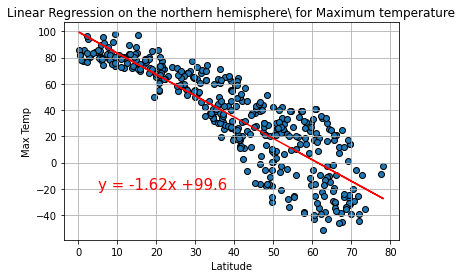

In [23]:
#linear regression on the northern hemisphers
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the northern hemisphere\ for Maximum temperature','Max Temp', (5,-20))

0.5836646014714307


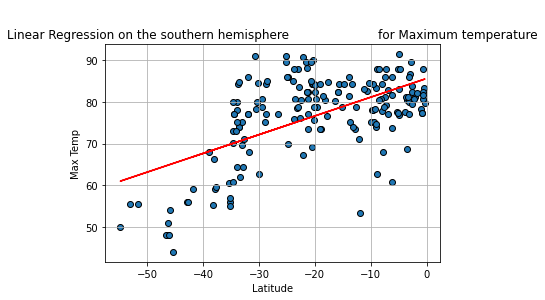

In [24]:
# linear regression on the southern hemispheres
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the southern hemisphere \
                      for Maximum temperature', 'Max Temp', (-50,100)
                       )

### 6.4.3 

0.4102336265507405


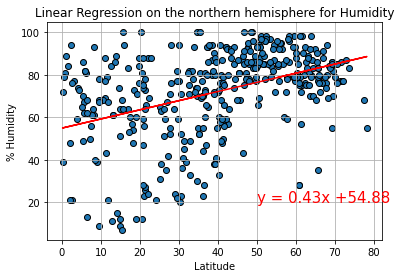

In [25]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the northern hemisphere for Humidity', '% Humidity' , (50,20))

0.1788971388745396


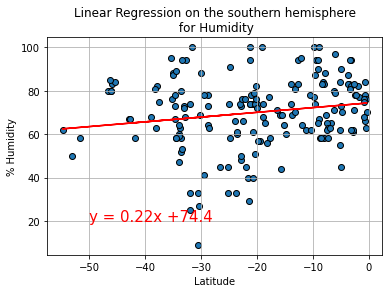

In [26]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the southern hemisphere\n for Humidity', '% Humidity' , (-50,20))

0.2103800699275864


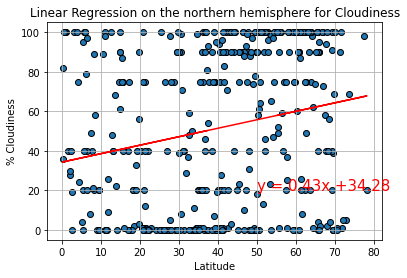

In [27]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the northern hemisphere for Cloudiness', '% Cloudiness' , (50,20))

0.445207334421104


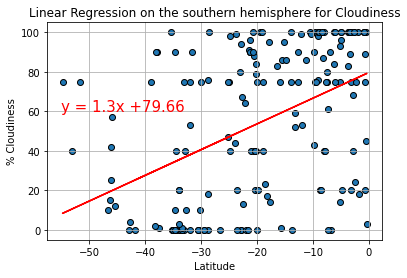

In [28]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the southern hemisphere for Cloudiness', '% Cloudiness' , (-55,60))

-0.11703954292392396


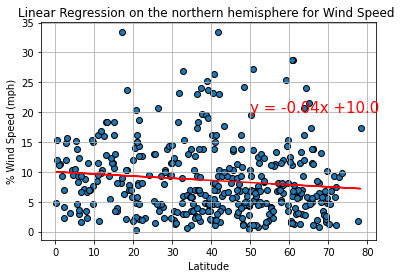

In [29]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the northern hemisphere for Wind Speed ', '% Wind Speed (mph)' , (50,20))

-0.018384894989342176


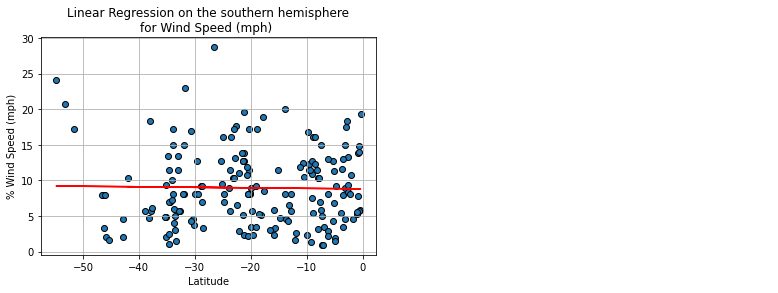

In [30]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the southern hemisphere\nfor Wind Speed (mph) ', '% Wind Speed (mph)' , (50,20))